Este notebook tem o intuito de extração de características interpretávéis para o telepectador, com ele calculei:
+ Média de horária de 7 meses de um determinado ano;
+ Média mensal de 7 meses de um determinado ano;
+ A têndencia com base na média diária dos 7 meses de cada ano.

Outros como a sazonalidade e autocorrelação da série eu calculei, mas não consegui ter algo de impacto que comprovasse minha hipóste, ou talvez seja ignorância minha de não ter visto algo.

In [1]:
# Gerar os labels das datas
import datetime

dt = datetime.datetime(2020, 1, 1)
end = datetime.datetime(2020, 7, 30)
step = datetime.timedelta(days=1)

datas = []

while dt < end:
    datas.append(dt.strftime('%m-%d'))
    dt += step

# 1. Import necessários

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from pandas.plotting import autocorrelation_plot
import metodos_imputacao as m_imputacao
import funcoes_importantes as f_im
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
fi = f_im.funcoes_importantes()
mimputacao = m_imputacao.metodos_de_imputacao()
warnings.filterwarnings('ignore')

# 2. Carregar dados

In [3]:
# Bases de Cerqueira Cesar 

ccesar_16 = pd.read_csv('../01.Dados/CSV/CO_Cerqueria_2016.csv').reset_index(drop=True).iloc[:-1,:]
ccesar_17 = pd.read_csv('../01.Dados/CSV/CO_Cerqueria_2017.csv')
ccesar_18 = pd.read_csv('../01.Dados/CSV/CO_Cerqueria_2018.csv')
ccesar_19 = pd.read_csv('../01.Dados/CSV/CO_Cerqueria_2019.csv')
ccesar_20 = pd.read_csv('../01.Dados/CSV/CO_Cerqueria_2020.csv').reset_index(drop=True).iloc[:-1,:]

# Base de Congonhas

congonhas_16 = pd.read_csv('../01.Dados/CSV/CO_Congonhas_2016.csv').reset_index(drop=True).iloc[:-1,:]
congonhas_17 = pd.read_csv('../01.Dados/CSV/CO_Congonhas_2017.csv')
congonhas_18 = pd.read_csv('../01.Dados/CSV/CO_Congonhas_2018.csv')
congonhas_19 = pd.read_csv('../01.Dados/CSV/CO_Congonhas_2019.csv')
congonhas_20 = pd.read_csv('../01.Dados/CSV/CO_Congonhas_2020.csv').reset_index(drop=True).iloc[:-1,:]

# Base de Mooca

mooca_16 = pd.read_csv('../01.Dados/CSV/CO_Mooca_2016.csv').reset_index(drop=True).iloc[:-1,:]
mooca_17 = pd.read_csv('../01.Dados/CSV/CO_Mooca_2017.csv')
mooca_18 = pd.read_csv('../01.Dados/CSV/CO_Mooca_2018.csv')
mooca_19 = pd.read_csv('../01.Dados/CSV/CO_Mooca_2019.csv')
mooca_20 = pd.read_csv('../01.Dados/CSV/CO_Mooca_2020.csv').reset_index(drop=True).iloc[:-1,:]

# Base Parque Pedro II

ppredo_16 = pd.read_csv('../01.Dados/CSV/CO_P_Pedro_2016.csv').reset_index(drop=True).iloc[:-1,:]
ppredo_17 = pd.read_csv('../01.Dados/CSV/CO_P_Pedro_2017.csv')
ppredo_18 = pd.read_csv('../01.Dados/CSV/CO_P_Pedro_2018.csv')
ppredo_19 = pd.read_csv('../01.Dados/CSV/CO_P_Pedro_2019.csv')
ppredo_20 = pd.read_csv('../01.Dados/CSV/CO_P_Pedro_2020.csv').reset_index(drop=True).iloc[:-1,:]

# Base Pinheiros 

pinheiros_16 = pd.read_csv('../01.Dados/CSV/CO_Pinheiros_2016.csv').reset_index(drop=True).iloc[:-1,:]
pinheiros_17 = pd.read_csv('../01.Dados/CSV/CO_Pinheiros_2017.csv')
pinheiros_18 = pd.read_csv('../01.Dados/CSV/CO_Pinheiros_2018.csv')
pinheiros_19 = pd.read_csv('../01.Dados/CSV/CO_Pinheiros_2019.csv')
pinheiros_20 = pd.read_csv('../01.Dados/CSV/CO_Pinheiros_2020.csv').reset_index(drop=True).iloc[:-1,:]

mes_null = pd.DataFrame([[np.nan]*24 for i in range(365-pinheiros_16.shape[0])], columns=[str(i) for i in range(1,25)])
pinheiros_16 = pd.concat([pinheiros_16, mes_null], axis='rows')

# 3.Tratamento de dados Faltantes

# 3.1 Base de Cerqueira Cesar

In [4]:
Cerqueira_Cesar_16 = [ccesar_16,congonhas_16,mooca_16,ppredo_16,pinheiros_16]
Cerqueira_Cesar_17 = [ccesar_17,congonhas_17,mooca_17,ppredo_17,pinheiros_17]
Cerqueira_Cesar_18 = [ccesar_18,congonhas_18,mooca_18,ppredo_18,pinheiros_18]
Cerqueira_Cesar_19 = [ccesar_19,congonhas_19,mooca_19,ppredo_19,pinheiros_19]
Cerqueira_Cesar_20 = [ccesar_20,congonhas_20,mooca_20,ppredo_20,pinheiros_20]   
raio_ccessar       = [7,7.4,4.7,3]

ccesar_16,a,b,c = mimputacao.completa_serie_IID(Cerqueira_Cesar_16,raio_ccessar)
ccesar_17,a,b,c = mimputacao.completa_serie_IID(Cerqueira_Cesar_17,raio_ccessar)
ccesar_18,a,b,c = mimputacao.completa_serie_IID(Cerqueira_Cesar_18,raio_ccessar)
ccesar_19,a,b,c = mimputacao.completa_serie_IID(Cerqueira_Cesar_19,raio_ccessar)
ccesar_20,a,b,c = mimputacao.completa_serie_IID(Cerqueira_Cesar_20,raio_ccessar)

# 3.2 Base de Congonhas

In [5]:
raio_congonhas = [2.79,7.26,7,8.73]
Congonhas_16   = [congonhas_16,pinheiros_16,ccesar_16,ppredo_16]
Congonhas_17   = [congonhas_17,pinheiros_17,ccesar_17,ppredo_17]
Congonhas_18   = [congonhas_18,pinheiros_18,ccesar_18,ppredo_18]
Congonhas_19   = [congonhas_19,pinheiros_19,ccesar_19,ppredo_19]
Congonhas_20   = [congonhas_20,pinheiros_20,ccesar_20,ppredo_20]

congonhas_16,a,b,c = mimputacao.completa_serie_IID(Congonhas_16,raio_congonhas)
congonhas_17,a,b,c = mimputacao.completa_serie_IID(Congonhas_17,raio_congonhas)
congonhas_18,a,b,c = mimputacao.completa_serie_IID(Congonhas_18,raio_congonhas)
congonhas_19,a,b,c = mimputacao.completa_serie_IID(Congonhas_19,raio_congonhas)
congonhas_20,a,b,c = mimputacao.completa_serie_IID(Congonhas_20,raio_congonhas)

# 3.3 Base de Mooca

In [6]:
raio_Mooca = [2.84,7.33]
Mooca_16   = [mooca_16,pinheiros_16,ccesar_16]
Mooca_17   = [mooca_17,pinheiros_17,ccesar_17]
Mooca_18   = [mooca_18,pinheiros_18,ccesar_18]
Mooca_19   = [mooca_19,pinheiros_19,ccesar_19]
Mooca_20   = [mooca_20,pinheiros_20,ccesar_20]

mooca_16,a,b,c = mimputacao.completa_serie_IID(Mooca_16,raio_Mooca)
mooca_17,a,b,c = mimputacao.completa_serie_IID(Mooca_17,raio_Mooca)
mooca_18,a,b,c = mimputacao.completa_serie_IID(Mooca_18,raio_Mooca)
mooca_19,a,b,c = mimputacao.completa_serie_IID(Mooca_19,raio_Mooca)
mooca_20,a,b,c = mimputacao.completa_serie_IID(Mooca_20,raio_Mooca)

# 3.4 Base Parque Pedro II

In [7]:
raio_parque_pedro_II = [2.81,4.68,7.73,8.71]
Parque_Pedro_II_16   = [ppredo_16,mooca_16,ccesar_16,pinheiros_16,congonhas_16]
Parque_Pedro_II_17   = [ppredo_17,mooca_17,ccesar_17,pinheiros_17,congonhas_17]
Parque_Pedro_II_18   = [ppredo_18,mooca_18,ccesar_18,pinheiros_18,congonhas_18]
Parque_Pedro_II_19   = [ppredo_19,mooca_19,ccesar_19,pinheiros_19,congonhas_19]
Parque_Pedro_II_20   = [ppredo_20,mooca_20,ccesar_20,pinheiros_20,congonhas_20]

ppredo_16,a,b,c = mimputacao.completa_serie_IID(Parque_Pedro_II_16,raio_parque_pedro_II)
ppredo_17,a,b,c = mimputacao.completa_serie_IID(Parque_Pedro_II_17,raio_parque_pedro_II)
ppredo_18,a,b,c = mimputacao.completa_serie_IID(Parque_Pedro_II_18,raio_parque_pedro_II)
ppredo_19,a,b,c = mimputacao.completa_serie_IID(Parque_Pedro_II_19,raio_parque_pedro_II)
ppredo_20,a,b,c = mimputacao.completa_serie_IID(Parque_Pedro_II_20,raio_parque_pedro_II)

# 3.5 Base Pinheiros 

In [8]:
Pinheiros_16   = [pinheiros_16,ccesar_16,ppredo_16,congonhas_16]
Pinheiros_17   = [pinheiros_17,ccesar_17,ppredo_17,congonhas_17]
Pinheiros_18   = [pinheiros_18,ccesar_18,ppredo_18,congonhas_18]
Pinheiros_19   = [pinheiros_19,ccesar_19,ppredo_19,congonhas_19]
Pinheiros_20   = [pinheiros_20,ccesar_20,ppredo_20,congonhas_20]
raio_pinheiros = [3.15,7.76,7.26]

pinheiros_16,a,b,c = mimputacao.completa_serie_EM(pinheiros_16)
pinheiros_17,a,b,c = mimputacao.completa_serie_EM(pinheiros_17)
pinheiros_18,a,b,c = mimputacao.completa_serie_EM(pinheiros_18)
pinheiros_19,a,b,c = mimputacao.completa_serie_EM(pinheiros_19)
pinheiros_20,a,b,c = mimputacao.completa_serie_EM(pinheiros_20)

# 4. Extração de caracteristica

# 4.1 Média das 24 horas

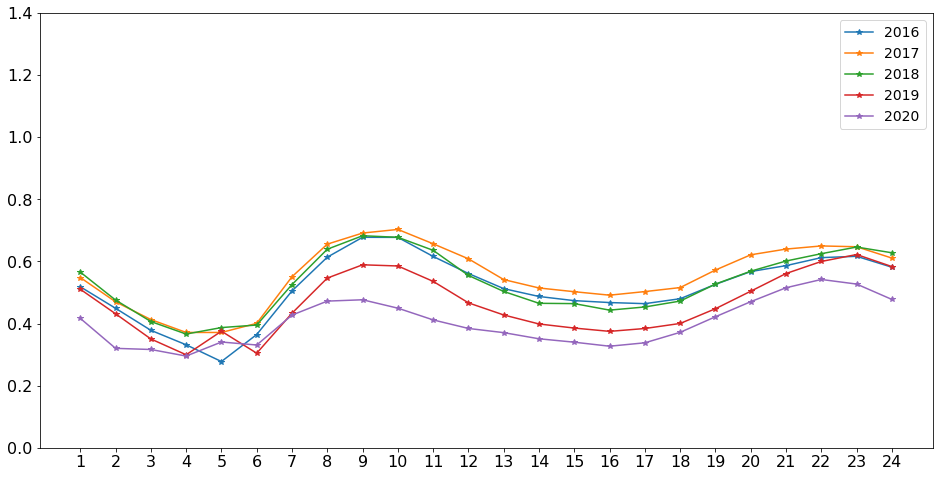

In [132]:
# Base de Cerqueria Cesar
plt.figure(figsize=(16,8))
# plt.title('Cerqueira Cesar',fontsize=20)
plt.plot(ccesar_16.mean(),'*-',label='2016')
plt.plot(ccesar_17.mean(),'*-',label='2017')
plt.plot(ccesar_18.mean(),'*-',label='2018')
plt.plot(ccesar_19.mean(),'*-',label='2019')
plt.plot(ccesar_20.mean(),'*-',label='2020')

plt.legend(loc='best', fontsize=14)
plt.xticks(size = 16)
plt.yticks(size = 16)
plt.ylim(0.0, 1.4)
plt.show()

Aqui você pode ver que a média horária dos meses de jan a jun do ano de 2020 é mais baixa do que a dos anos anteriores, isso dá ao fato do período da pandemia no qual teve grande impacto nos diferentes setores do comércio da região.

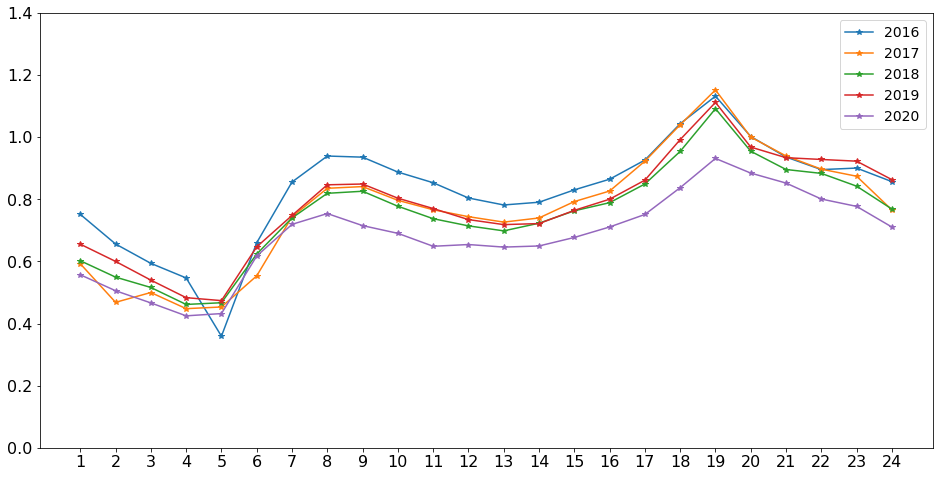

In [133]:
# Base de Congonhas
plt.figure(figsize=(16,8))
# plt.title('Congonhas',fontsize=20)
plt.plot(congonhas_16.mean(),'*-',label='2016')
plt.plot(congonhas_17.mean(),'*-',label='2017')
plt.plot(congonhas_18.mean(),'*-',label='2018')
plt.plot(congonhas_19.mean(),'*-',label='2019')
plt.plot(congonhas_20.mean(),'*-',label='2020')

plt.legend(loc='best', fontsize=14)
plt.xticks(size = 16)
plt.yticks(size = 16)
plt.ylim(0.0, 1.4)
plt.show()

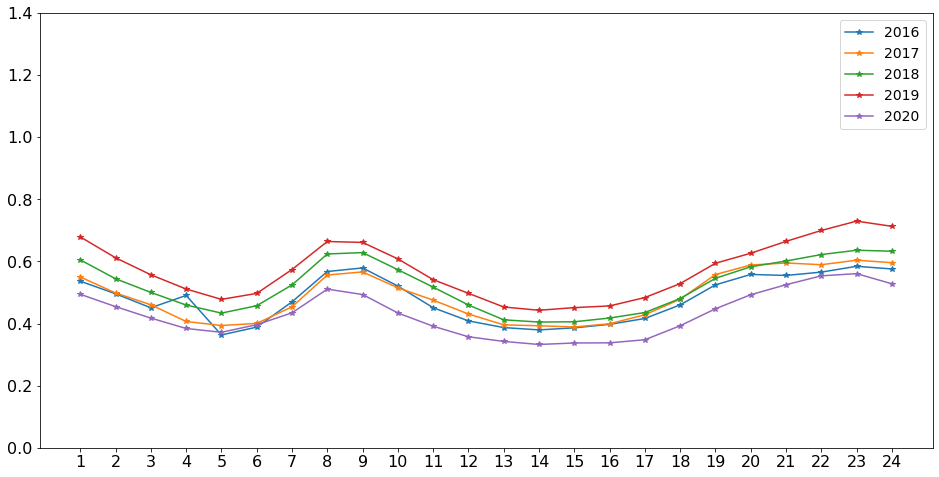

In [134]:
# Base de Mooca
plt.figure(figsize=(16,8))
# plt.title('Mooca',fontsize=20)
plt.plot(mooca_16.mean(),'*-',label='2016')
plt.plot(mooca_17.mean(),'*-',label='2017')
plt.plot(mooca_18.mean(),'*-',label='2018')
plt.plot(mooca_19.mean(),'*-',label='2019')
plt.plot(mooca_20.mean(),'*-',label='2020')

plt.legend(loc='best', fontsize=14)
plt.xticks(size = 16)
plt.yticks(size = 16)
plt.ylim(0.0, 1.4)
plt.show()

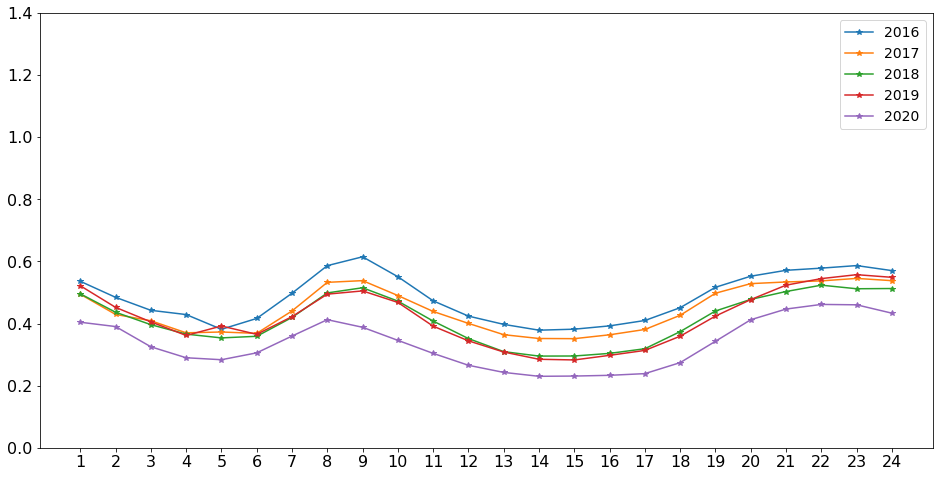

In [135]:
# Base de Parque Pedro II
plt.figure(figsize=(16,8))
# plt.title('Parque Pedro  II',fontsize=20)
plt.plot(ppredo_16.mean(),'*-',label='2016')
plt.plot(ppredo_17.mean(),'*-',label='2017')
plt.plot(ppredo_18.mean(),'*-',label='2018')
plt.plot(ppredo_19.mean(),'*-',label='2019')
plt.plot(ppredo_20.mean(),'*-',label='2020')

plt.legend(loc='best', fontsize=14)
plt.xticks(size = 16)
plt.yticks(size = 16)
plt.ylim(0.0, 1.4)
plt.show()

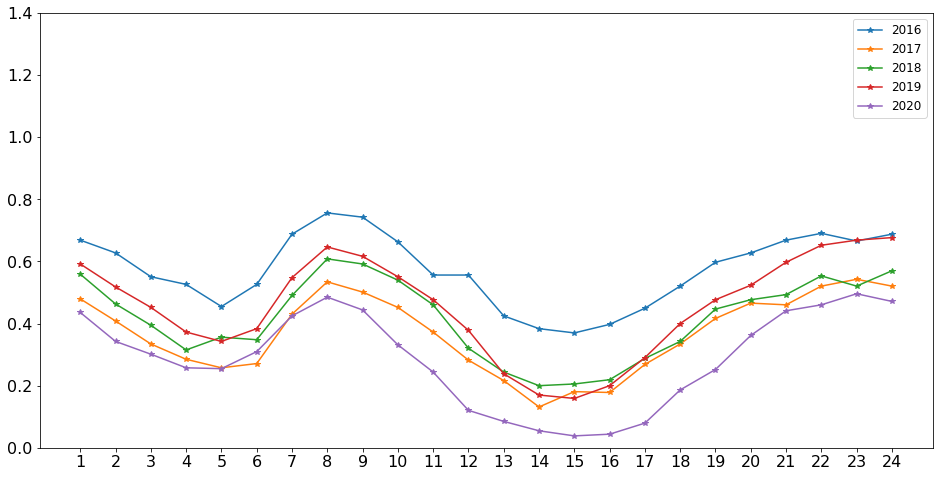

In [136]:
# Base de Pinheiros
plt.figure(figsize=(16,8))
# plt.title('Pinheros',fontsize=20)
plt.plot(pinheiros_16.mean(),'*-',label='2016')
plt.plot(pinheiros_17.mean(),'*-',label='2017')
plt.plot(pinheiros_18.mean(),'*-',label='2018')
plt.plot(pinheiros_19.mean(),'*-',label='2019')
plt.plot(pinheiros_20.mean(),'*-',label='2020')

plt.legend(loc='best', fontsize=12)
plt.xticks(size = 16)
plt.yticks(size = 16)
plt.ylim(0.0, 1.4)
plt.show()

#### Aqui você pode ver com esses resultados, a média horária dos meses de jan a jun do ano de 2020 é mais baixa do que a dos anos anteriores, a causa é o período da pandemia no qual teve grande impacto nos diferentes setores do comércio da região.

<div style='border-top: 2px solid red;'></div>

# 4.2 Média dos 7 meses

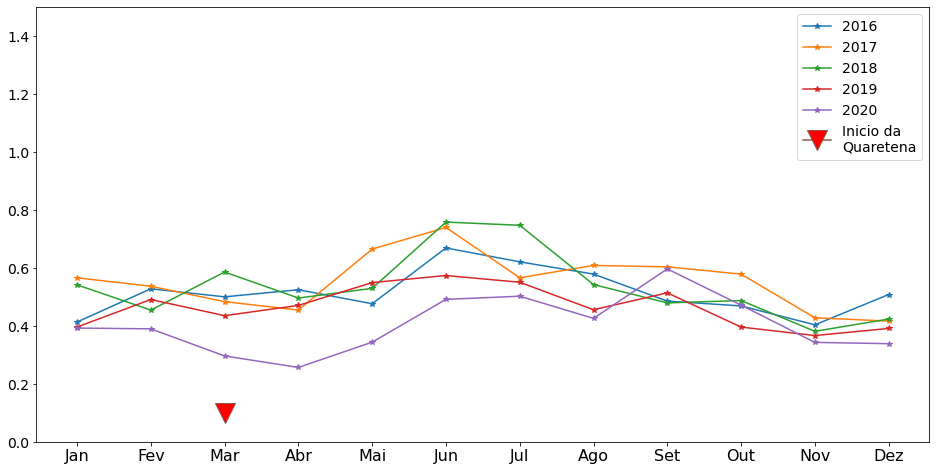

In [142]:
plt.figure(figsize=(16,8))
# plt.title('Cerqueira Cesar',fontsize=20)
plt.plot(fi.media_mes(mimputacao.divide_p_mes(ccesar_16)),'*-',label='2016')
plt.plot(fi.media_mes(mimputacao.divide_p_mes(ccesar_17)),'*-',label='2017')
plt.plot(fi.media_mes(mimputacao.divide_p_mes(ccesar_18)),'*-',label='2018')
plt.plot(fi.media_mes(mimputacao.divide_p_mes(ccesar_19)),'*-',label='2019')
plt.plot(fi.media_mes(mimputacao.divide_p_mes(ccesar_20)),'*-',label='2020')
plt.plot(2,0.1,marker='v',markerfacecolor='red',markersize=20,label='Inicio da\nQuaretena');

plt.xticks([i for i in range(12)],['Jan','Fev','Mar','Abr','Mai','Jun',
                                  'Jul','Ago','Set','Out','Nov','Dez'],rotation=0)
plt.legend(loc='best', fontsize=14)
plt.xticks(size = 16)
plt.yticks(size = 14)
plt.ylim(0.0, 1.5)
plt.show()

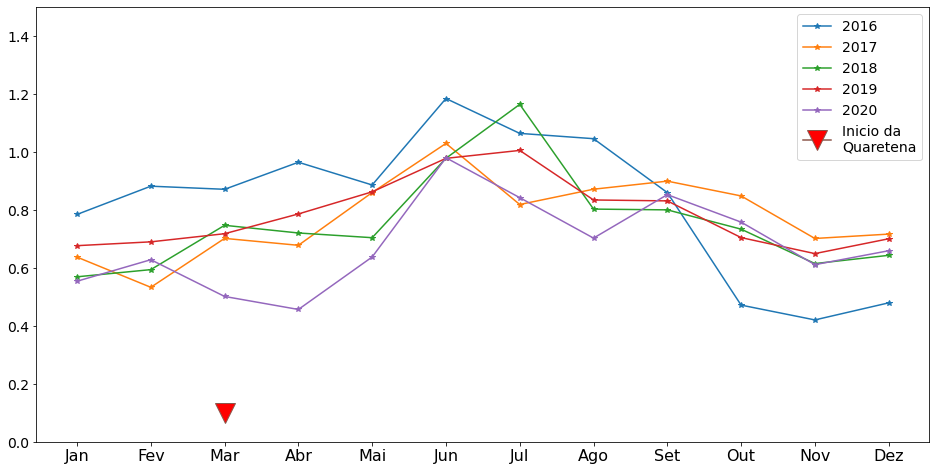

In [143]:
plt.figure(figsize=(16,8))
# plt.title('Congonhas',fontsize=20)
plt.plot(fi.media_mes(mimputacao.divide_p_mes(congonhas_16)),'*-',label='2016')
plt.plot(fi.media_mes(mimputacao.divide_p_mes(congonhas_17)),'*-',label='2017')
plt.plot(fi.media_mes(mimputacao.divide_p_mes(congonhas_18)),'*-',label='2018')
plt.plot(fi.media_mes(mimputacao.divide_p_mes(congonhas_19)),'*-',label='2019')
plt.plot(fi.media_mes(mimputacao.divide_p_mes(congonhas_20)),'*-',label='2020')
plt.plot(2,0.1,marker='v',markerfacecolor='red',markersize=20,label='Inicio da\nQuaretena');

plt.xticks([i for i in range(12)],['Jan','Fev','Mar','Abr','Mai','Jun',
                                  'Jul','Ago','Set','Out','Nov','Dez'],rotation=0)
plt.legend(loc='best', fontsize=14)
plt.xticks(size = 16)
plt.yticks(size = 14)
plt.ylim(0.0, 1.5)
plt.show()

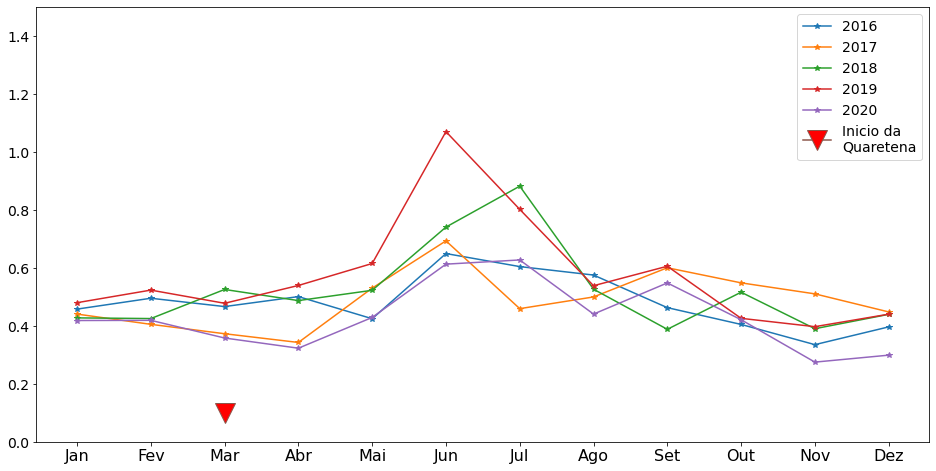

In [144]:
plt.figure(figsize=(16,8))
# plt.title('Mooca',fontsize=20)
plt.plot(fi.media_mes(mimputacao.divide_p_mes(mooca_16)),'*-',label='2016')
plt.plot(fi.media_mes(mimputacao.divide_p_mes(mooca_17)),'*-',label='2017')
plt.plot(fi.media_mes(mimputacao.divide_p_mes(mooca_18)),'*-',label='2018')
plt.plot(fi.media_mes(mimputacao.divide_p_mes(mooca_19)),'*-',label='2019')
plt.plot(fi.media_mes(mimputacao.divide_p_mes(mooca_20)),'*-',label='2020')
plt.plot(2,0.1,marker='v',markerfacecolor='red',markersize=20,label='Inicio da\nQuaretena');

plt.xticks([i for i in range(12)],['Jan','Fev','Mar','Abr','Mai','Jun',
                                  'Jul','Ago','Set','Out','Nov','Dez'],rotation=0)
plt.legend(loc='best', fontsize=14)
plt.xticks(size = 16)
plt.yticks(size = 14)
plt.ylim(0.0, 1.5)
plt.show()

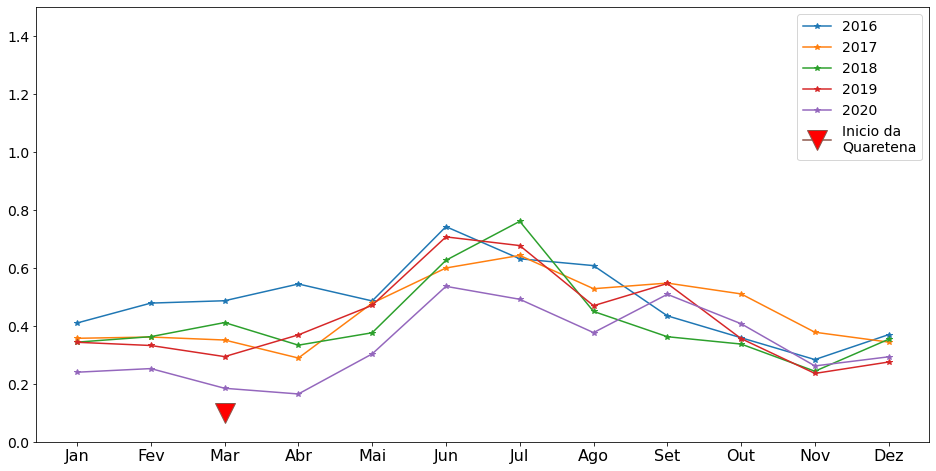

In [145]:
plt.figure(figsize=(16,8))
# plt.title('Parque Pedro II',fontsize=20)
plt.plot(fi.media_mes(mimputacao.divide_p_mes(ppredo_16)),'*-',label='2016')
plt.plot(fi.media_mes(mimputacao.divide_p_mes(ppredo_17)),'*-',label='2017')
plt.plot(fi.media_mes(mimputacao.divide_p_mes(ppredo_18)),'*-',label='2018')
plt.plot(fi.media_mes(mimputacao.divide_p_mes(ppredo_19)),'*-',label='2019')
plt.plot(fi.media_mes(mimputacao.divide_p_mes(ppredo_20)),'*-',label='2020')
plt.plot(2,0.1,marker='v',markerfacecolor='red',markersize=20,label='Inicio da\nQuaretena');

plt.xticks([i for i in range(12)],['Jan','Fev','Mar','Abr','Mai','Jun',
                                  'Jul','Ago','Set','Out','Nov','Dez'],rotation=0)
plt.legend(loc='best', fontsize=14)
plt.xticks(size = 16)
plt.yticks(size = 14)
plt.ylim(0.0, 1.5)
plt.show()

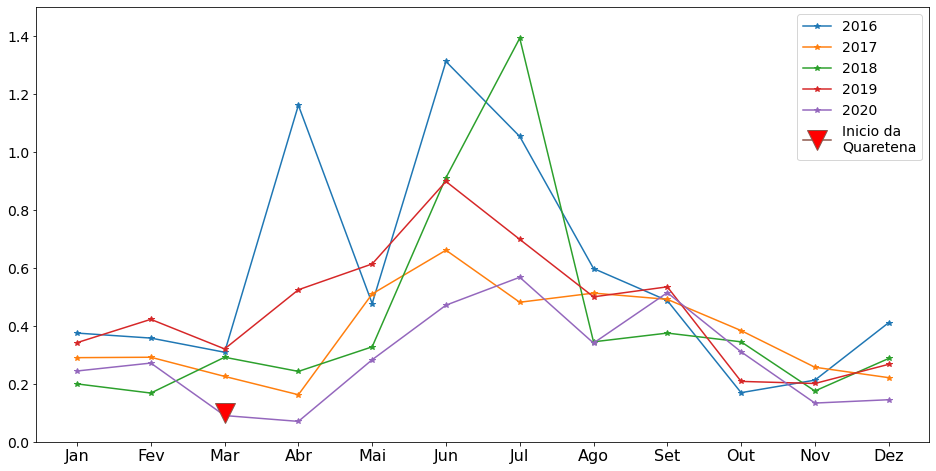

In [146]:
plt.figure(figsize=(16,8))
# plt.title('Pinheiros',fontsize=20)
plt.plot(fi.media_mes(mimputacao.divide_p_mes(pinheiros_16)),'*-',label='2016')
plt.plot(fi.media_mes(mimputacao.divide_p_mes(pinheiros_17)),'*-',label='2017')
plt.plot(fi.media_mes(mimputacao.divide_p_mes(pinheiros_18)),'*-',label='2018')
plt.plot(fi.media_mes(mimputacao.divide_p_mes(pinheiros_19)),'*-',label='2019')
plt.plot(fi.media_mes(mimputacao.divide_p_mes(pinheiros_20)),'*-',label='2020')
plt.plot(2,0.1,marker='v',markerfacecolor='red',markersize=20,label='Inicio da\nQuaretena');

plt.xticks([i for i in range(12)],['Jan','Fev','Mar','Abr','Mai','Jun',
                                  'Jul','Ago','Set','Out','Nov','Dez'],rotation=0)
plt.legend(loc='best', fontsize=14)
plt.xticks(size = 16)
plt.yticks(size = 14)
plt.ylim(0.0, 1.5)
plt.show()

#### Com este gráfico podemos ver que os meses de fevereiro para março teve um forte redução das emissões de gas carbonio, após isso de março para maio teve um aumento das emissões e que pode-se entender que como  retomada do comércio. Além disso, pode-se perceber que já nos meses de junho e junho os valor médio mensal do ano de 2020 se aproximou mais dos anos anteriores.

<div style='border-top: 2px solid red;'></div>

# 4.3 Tendência dos 7 meses

In [20]:
ccesar_16_decompose   = seasonal_decompose(ccesar_16.mean(axis='columns'),period=30)
ccesar_17_decompose   = seasonal_decompose(ccesar_17.mean(axis='columns'),period=30)
ccesar_18_decompose   = seasonal_decompose(ccesar_18.mean(axis='columns'),period=30)
ccesar_19_decompose   = seasonal_decompose(ccesar_19.mean(axis='columns'),period=30)
ccesar_20_decompose   = seasonal_decompose(ccesar_20.mean(axis='columns'),period=30)

congonhas_16_decompose   = seasonal_decompose(congonhas_16.mean(axis='columns'),period=30)
congonhas_17_decompose   = seasonal_decompose(congonhas_17.mean(axis='columns'),period=30)
congonhas_18_decompose   = seasonal_decompose(congonhas_18.mean(axis='columns'),period=30)
congonhas_19_decompose   = seasonal_decompose(congonhas_19.mean(axis='columns'),period=30)
congonhas_20_decompose   = seasonal_decompose(congonhas_20.mean(axis='columns'),period=30)

mooca_16_decompose   = seasonal_decompose(mooca_16.mean(axis='columns'),period=30)
mooca_17_decompose   = seasonal_decompose(mooca_17.mean(axis='columns'),period=30)
mooca_18_decompose   = seasonal_decompose(mooca_18.mean(axis='columns'),period=30)
mooca_19_decompose   = seasonal_decompose(mooca_19.mean(axis='columns'),period=30)
mooca_20_decompose   = seasonal_decompose(mooca_20.mean(axis='columns'),period=30)

ppredo_16_decompose   = seasonal_decompose(ppredo_16.mean(axis='columns'),period=30)
ppredo_17_decompose   = seasonal_decompose(ppredo_17.mean(axis='columns'),period=30)
ppredo_18_decompose   = seasonal_decompose(ppredo_18.mean(axis='columns'),period=30)
ppredo_19_decompose   = seasonal_decompose(ppredo_19.mean(axis='columns'),period=30)
ppredo_20_decompose   = seasonal_decompose(ppredo_20.mean(axis='columns'),period=30)

pinheiros_16_decompose   = seasonal_decompose(pinheiros_16.mean(axis='columns'),period=30)
pinheiros_17_decompose   = seasonal_decompose(pinheiros_17.mean(axis='columns'),period=30)
pinheiros_18_decompose   = seasonal_decompose(pinheiros_18.mean(axis='columns'),period=30)
pinheiros_19_decompose   = seasonal_decompose(pinheiros_19.mean(axis='columns'),period=30)
pinheiros_20_decompose   = seasonal_decompose(pinheiros_20.mean(axis='columns'),period=30)

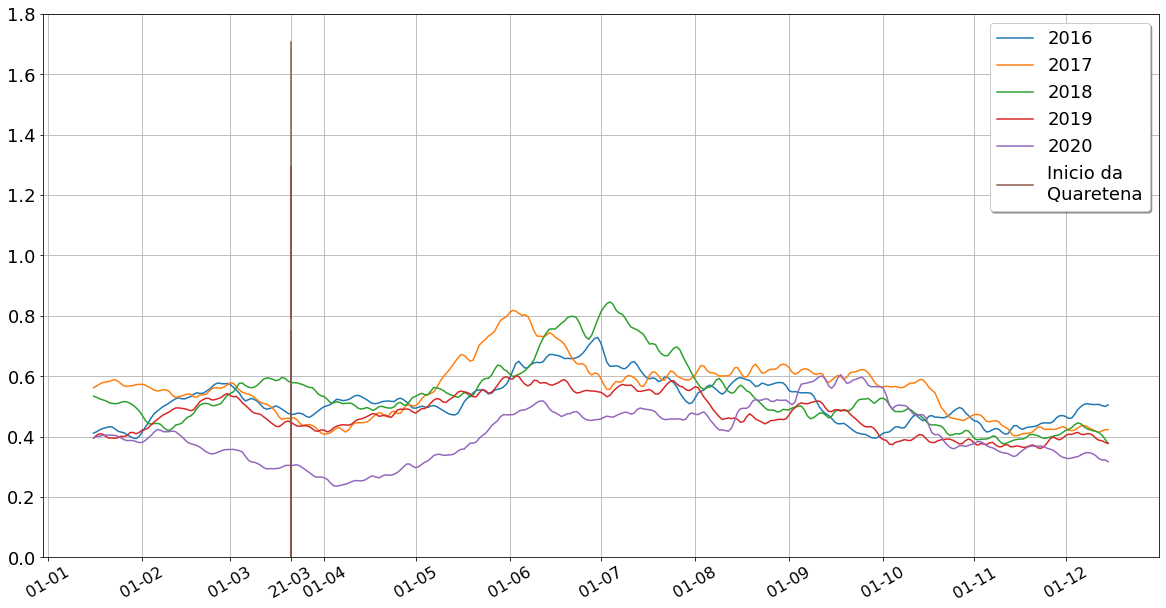

In [141]:
plt.figure(figsize=(20,10))

x = ccesar_16.index
# plt.title('Tendência da base Cerqueira Cesar',fontsize=20)
ccesar_16_decompose.trend.plot();
ccesar_17_decompose.trend.plot();
ccesar_18_decompose.trend.plot();
ccesar_19_decompose.trend.plot();
ccesar_20_decompose.trend.plot();

plt.plot([80 for i in range(pinheiros_20.round(2).mean(axis='columns').unique().shape[0])],
         pinheiros_20.round(2).mean(axis='columns').unique(),label='Inicio da quaretena')

plt.xticks(size = 16)
plt.yticks(size = 18)
plt.ylim(0.0, 1.8)

plt.xticks([0, 31, 60, 80, 91, 121,
            152, 182, 213, 244, 275, 305,
            335],
           ['01-01','01-02','01-03','21-03','01-04','01-05',
            '01-06','01-07','01-08','01-09','01-10','01-11',
            '01-12'],
           rotation=30)

plt.legend(['2016','2017','2018','2019','2020','Inicio da\nQuaretena'], loc='best', fontsize = 18, shadow=True)

plt.grid()
plt.show()

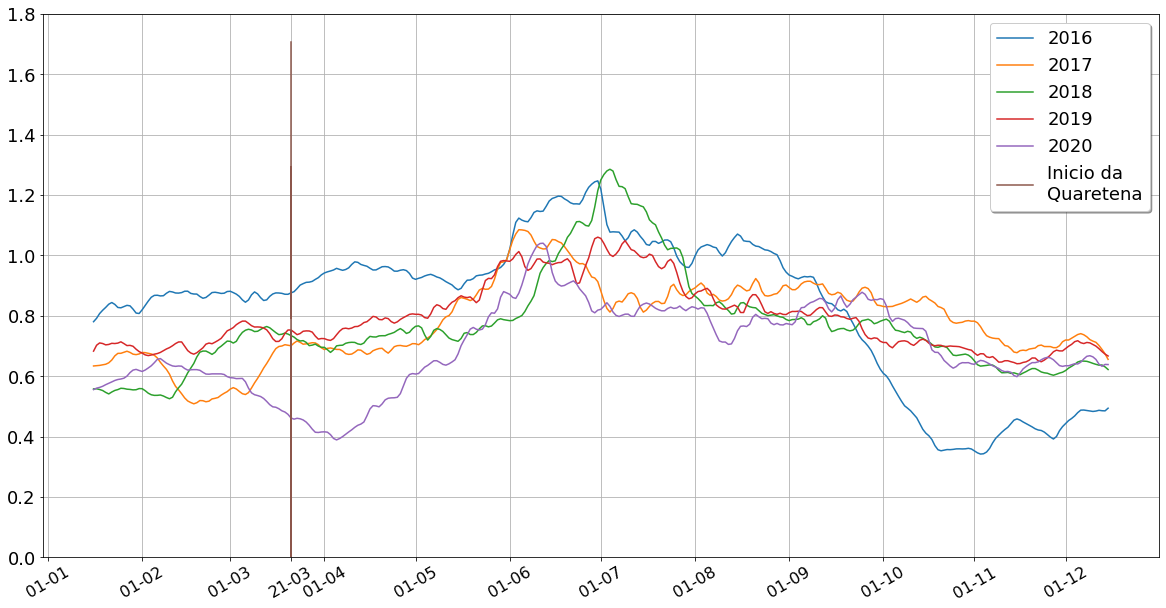

In [140]:
plt.figure(figsize=(20,10))
x = ccesar_16.index
# plt.title('Tendência da base Congonhas',fontsize=20)
congonhas_16_decompose.trend.plot();
congonhas_17_decompose.trend.plot();
congonhas_18_decompose.trend.plot();
congonhas_19_decompose.trend.plot();
congonhas_20_decompose.trend.plot();
plt.plot([80 for i in range(pinheiros_20.round(2).mean(axis='columns').unique().shape[0])],
         pinheiros_20.round(2).mean(axis='columns').unique(),label='Inicio da quaretena')

plt.xticks(size = 16)
plt.yticks(size = 18)
plt.ylim(0.0, 1.8)

plt.xticks([0, 31, 60, 80, 91, 121,
            152, 182, 213, 244, 275, 305,
            335],
           ['01-01','01-02','01-03','21-03','01-04','01-05',
            '01-06','01-07','01-08','01-09','01-10','01-11',
            '01-12'],
           rotation=30)

plt.legend(['2016','2017','2018','2019','2020','Inicio da\nQuaretena'], loc='best', fontsize = 18, shadow=True)

plt.grid()
plt.show()

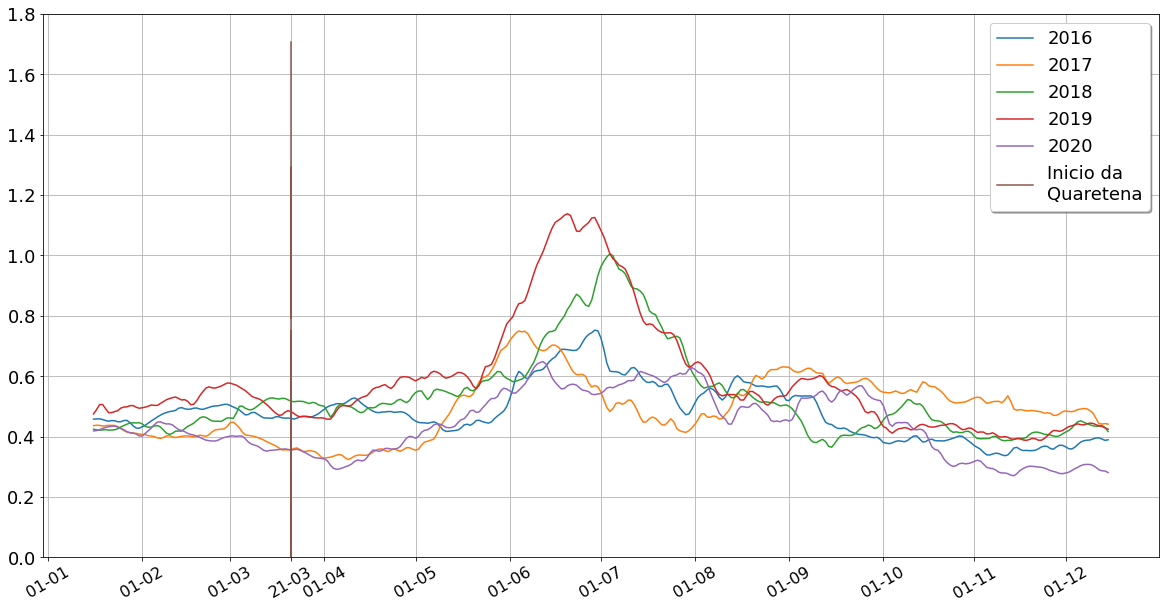

In [139]:
plt.figure(figsize=(20,10))
# plt.title('Tendência da base Mooca',fontsize=20)
mooca_16_decompose.trend.plot()
mooca_17_decompose.trend.plot()
mooca_18_decompose.trend.plot()
mooca_19_decompose.trend.plot()
mooca_20_decompose.trend.plot()
plt.plot([80 for i in range(pinheiros_20.round(2).mean(axis='columns').unique().shape[0])],
         pinheiros_20.round(2).mean(axis='columns').unique(),label='Inicio da quaretena')

plt.xticks(size = 16)
plt.yticks(size = 18)
plt.ylim(0.0, 1.8)

plt.xticks([0, 31, 60, 80, 91, 121,
            152, 182, 213, 244, 275, 305,
            335],
           ['01-01','01-02','01-03','21-03','01-04','01-05',
            '01-06','01-07','01-08','01-09','01-10','01-11',
            '01-12'],
           rotation=30)

plt.legend(['2016','2017','2018','2019','2020','Inicio da\nQuaretena'], loc='best', fontsize = 18, shadow=True)

plt.grid()
plt.show()

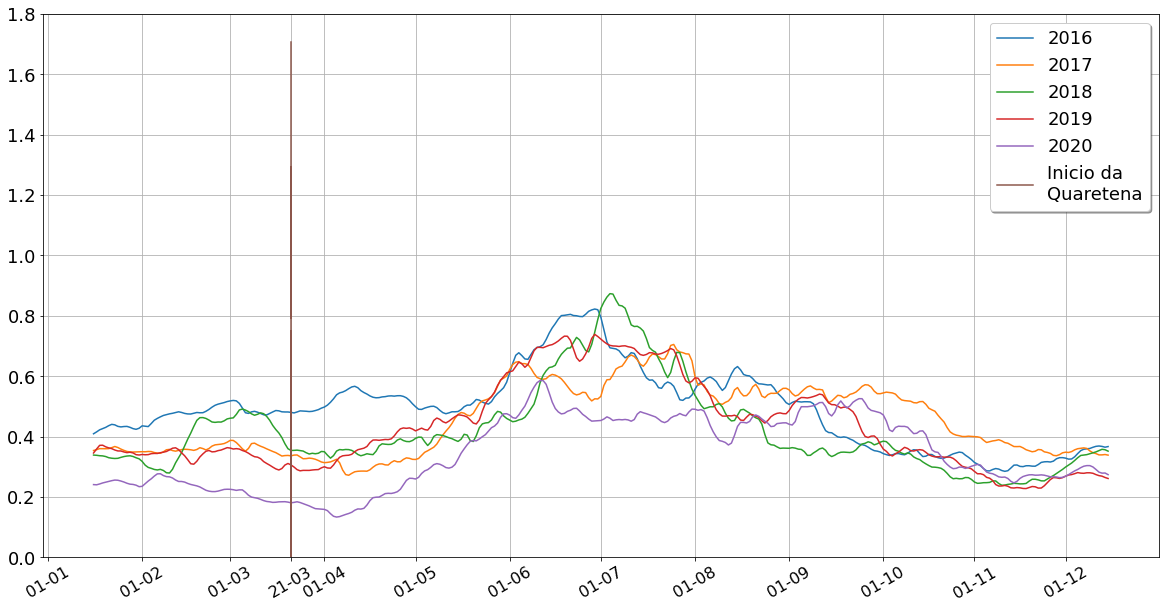

In [138]:
plt.figure(figsize=(20,10))
# plt.title('Tendência da base Parque Pedro II',fontsize=20)
ppredo_16_decompose.trend.plot();
ppredo_17_decompose.trend.plot();
ppredo_18_decompose.trend.plot();
ppredo_19_decompose.trend.plot();
ppredo_20_decompose.trend.plot();
plt.plot([80 for i in range(pinheiros_20.round(2).mean(axis='columns').unique().shape[0])],
         pinheiros_20.round(2).mean(axis='columns').unique(),label='Inicio da quaretena')

plt.xticks(size = 16)
plt.yticks(size = 18)
plt.ylim(0.0, 1.8)

plt.xticks([0, 31, 60, 80, 91, 121,
            152, 182, 213, 244, 275, 305,
            335],
           ['01-01','01-02','01-03','21-03','01-04','01-05',
            '01-06','01-07','01-08','01-09','01-10','01-11',
            '01-12'],
           rotation=30)

plt.legend(['2016','2017','2018','2019','2020','Inicio da\nQuaretena'], loc='best', fontsize = 18, shadow=True)

plt.grid()
plt.show()

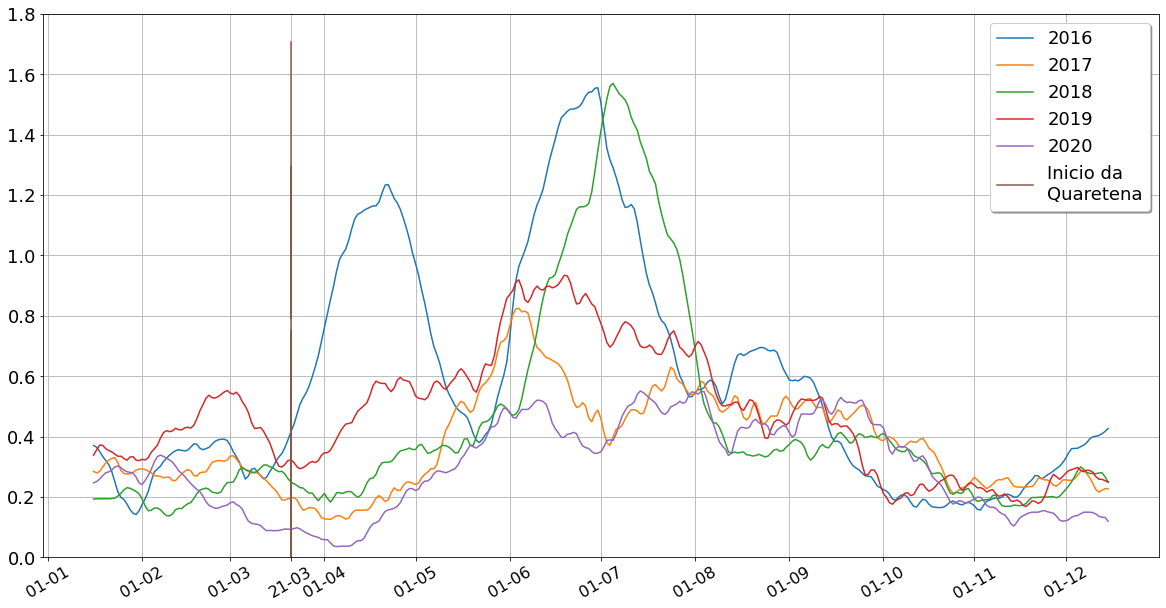

In [137]:
plt.figure(figsize=(20,10))
# plt.title('Tendência da base Pinheiros',fontsize=20)
pinheiros_16_decompose.trend.plot()
pinheiros_17_decompose.trend.plot()
pinheiros_18_decompose.trend.plot()
pinheiros_19_decompose.trend.plot()
pinheiros_20_decompose.trend.plot()
plt.plot([80 for i in range(pinheiros_20.round(2).mean(axis='columns').unique().shape[0])],
         pinheiros_20.round(2).mean(axis='columns').unique(),label='Inicio da quaretena')

plt.xticks(size = 16)
plt.yticks(size = 18)
plt.ylim(0.0, 1.8)

plt.xticks([0, 31, 60, 80, 91, 121,
            152, 182, 213, 244, 275, 305,
            335],
           ['01-01','01-02','01-03','21-03','01-04','01-05',
            '01-06','01-07','01-08','01-09','01-10','01-11',
            '01-12'],
           rotation=30)

plt.legend(['2016','2017','2018','2019','2020','Inicio da\nQuaretena'], loc='best', fontsize = 18, shadow=True)

plt.grid()
plt.show()

Com os gráficos de tendência da séries temporais mostra que o comércio teve impacto já antes do anúcio da quaretena, mais especificamente por volta do dia 6 e 8 de fevereiro, após anúcio da quarentena que no dia 21 de março, o efeito foi ainda maior onde pode ver que os valores de gás cabornico não os menores do periodo, isso continua até por do dia 06 e 08 de abril onde pode perceber um 'cotovelo' nos gráficos, logos após esses dias houve aumento na emissão de gases que indica a recuperação de comércio.

<div style='border-top: 2px solid red;'></div>

# 4.4 Sazonalidade dos 7 meses

In [26]:
# plt.figure(figsize=(16,2))
# plt.title('Sazonalidade da base Cerqueira Cesar 2016',fontsize=20)
# ccesar_16_decompose.seasonal.plot()
# plt.show()

# plt.figure(figsize=(16,2))
# plt.title('Sazonalidade da base Cerqueira Cesar 2017',fontsize=20)
# ccesar_17_decompose.seasonal.plot()
# plt.show()

# plt.figure(figsize=(16,2))
# plt.title('Sazonalidade da base Cerqueira Cesar 2018',fontsize=20)
# ccesar_18_decompose.seasonal.plot()
# plt.show()

# plt.figure(figsize=(16,2))
# plt.title('Sazonalidade da base Cerqueira Cesar 2019',fontsize=20)
# ccesar_19_decompose.seasonal.plot()
# plt.show()

# plt.figure(figsize=(16,2))
# plt.title('Sazonalidade da base Cerqueira Cesar 2020',fontsize=20)
# ccesar_20_decompose.seasonal.plot()
# plt.show()

In [27]:
# plt.figure(figsize=(16,2))
# plt.title('Sazonalidade da base Congonhas 2016',fontsize=20)
# congonhas_16_decompose.seasonal.plot()
# plt.show()

# plt.figure(figsize=(16,2))
# plt.title('Sazonalidade da base Congonhas 2017',fontsize=20)
# congonhas_17_decompose.seasonal.plot()
# plt.show()

# plt.figure(figsize=(16,2))
# plt.title('Sazonalidade da base Congonhas 2018',fontsize=20)
# congonhas_18_decompose.seasonal.plot()
# plt.show()

# plt.figure(figsize=(16,2))
# plt.title('Sazonalidade da base Congonhas 2019',fontsize=20)
# congonhas_19_decompose.seasonal.plot()
# plt.show()

# plt.figure(figsize=(16,2))
# plt.title('Sazonalidade da base Congonhas 2020',fontsize=20)
# congonhas_20_decompose.seasonal.plot()
# plt.show()

In [28]:
# plt.figure(figsize=(16,2))
# plt.title('Sazonalidade da base Mooca 2016',fontsize=20)
# mooca_16_decompose.seasonal.plot()
# plt.show()

# plt.figure(figsize=(16,2))
# plt.title('Sazonalidade da base Mooca 2017',fontsize=20)
# mooca_17_decompose.seasonal.plot()
# plt.show()

# plt.figure(figsize=(16,2))
# plt.title('Sazonalidade da base Mooca 2018',fontsize=20)
# mooca_18_decompose.seasonal.plot()
# plt.show()

# plt.figure(figsize=(16,2))
# plt.title('Sazonalidade da base Mooca 2019',fontsize=20)
# mooca_19_decompose.seasonal.plot()
# plt.show()

# plt.figure(figsize=(16,2))
# plt.title('Sazonalidade da base Mooca 2020',fontsize=20)
# mooca_20_decompose.seasonal.plot()
# plt.show()

In [29]:
# plt.figure(figsize=(16,2))
# plt.title('Sazonalidade da base Parque Pedro II 2016',fontsize=20)
# ppredo_16_decompose.seasonal.plot()
# plt.show()

# plt.figure(figsize=(16,2))
# plt.title('Sazonalidade da base Parque Pedro II 2017',fontsize=20)
# ppredo_17_decompose.seasonal.plot()
# plt.show()

# plt.figure(figsize=(16,2))
# plt.title('Sazonalidade da base Parque Pedro II 2018',fontsize=20)
# ppredo_18_decompose.seasonal.plot()
# plt.show()

# plt.figure(figsize=(16,2))
# plt.title('Sazonalidade da base Parque Pedro II 2019',fontsize=20)
# ppredo_19_decompose.seasonal.plot()
# plt.show()

# plt.figure(figsize=(16,2))
# plt.title('Sazonalidade da base Parque Pedro II 2020',fontsize=20)
# ppredo_20_decompose.seasonal.plot()
# plt.show()

In [30]:
# plt.figure(figsize=(16,2))
# plt.title('Sazonalidade da base Pinheiros 2016',fontsize=20)
# pinheiros_16_decompose.seasonal.plot()
# plt.show()

# plt.figure(figsize=(16,2))
# plt.title('Sazonalidade da base Pinheiros 2017',fontsize=20)
# pinheiros_17_decompose.seasonal.plot()
# plt.show()

# plt.figure(figsize=(16,2))
# plt.title('Sazonalidade da base Pinheiros 2018',fontsize=20)
# pinheiros_18_decompose.seasonal.plot()
# plt.show()

# plt.figure(figsize=(16,2))
# plt.title('Sazonalidade da base Pinheiros 2019',fontsize=20)
# pinheiros_19_decompose.seasonal.plot()
# plt.show()

# plt.figure(figsize=(16,2))
# plt.title('Sazonalidade da base Pinheiros 2020',fontsize=20)
# pinheiros_20_decompose.seasonal.plot()
# plt.show()

In [31]:
# plt.figure(figsize=(16,2))
# plt.title('Sazonalidade da base Ibirapuera 2016',fontsize=20)
# ibirapuera_16_decompose.seasonal.plot()
# plt.show()

# plt.figure(figsize=(16,2))
# plt.title('Sazonalidade da base Ibirapuera 2017',fontsize=20)
# ibirapuera_17_decompose.seasonal.plot()
# plt.show()

# plt.figure(figsize=(16,2))
# plt.title('Sazonalidade da base Ibirapuera 2018',fontsize=20)
# ibirapuera_18_decompose.seasonal.plot()
# plt.show()

# plt.figure(figsize=(16,2))
# plt.title('Sazonalidade da base Ibirapuera 2019',fontsize=20)
# ibirapuera_19_decompose.seasonal.plot()
# plt.show()

# plt.figure(figsize=(16,2))
# plt.title('Sazonalidade da base Ibirapuera 2020',fontsize=20)
# ibirapuera_20_decompose.seasonal.plot()
# plt.show()

# 4.5 Resíduos dos 7 meses

In [32]:
# plt.figure(figsize=(16,2))
# plt.title('Resíduo da base Cerqueira Cesar 2016',fontsize=20)
# ccesar_16_decompose.resid.plot()
# plt.show()

# plt.figure(figsize=(16,2))
# plt.title('Resíduo da base Cerqueira Cesar 2017',fontsize=20)
# ccesar_17_decompose.resid.plot()
# plt.show()

# plt.figure(figsize=(16,2))
# plt.title('Resíduo da base Cerqueira Cesar 2018',fontsize=20)
# ccesar_18_decompose.resid.plot()
# plt.show()

# plt.figure(figsize=(16,2))
# plt.title('Resíduo da base Cerqueira Cesar 2019',fontsize=20)
# ccesar_19_decompose.resid.plot()
# plt.show()

# plt.figure(figsize=(16,2))
# plt.title('Resíduo da base Cerqueira Cesar 2020',fontsize=20)
# ccesar_20_decompose.resid.plot()
# plt.show()

In [33]:
# plt.figure(figsize=(16,2))
# plt.title('Resíduo da base Congonhas 2016',fontsize=20)
# congonhas_16_decompose.resid.plot()
# plt.show()

# plt.figure(figsize=(16,2))
# plt.title('Resíduo da base Congonhas 2017',fontsize=20)
# congonhas_17_decompose.resid.plot()
# plt.show()

# plt.figure(figsize=(16,2))
# plt.title('Resíduo da base Congonhas 2018',fontsize=20)
# congonhas_18_decompose.resid.plot()
# plt.show()

# plt.figure(figsize=(16,2))
# plt.title('Resíduo da base Congonhas 2019',fontsize=20)
# congonhas_19_decompose.resid.plot()
# plt.show()

# plt.figure(figsize=(16,2))
# plt.title('Resíduo da base Congonhas 2020',fontsize=20)
# congonhas_20_decompose.resid.plot()
# plt.show()

In [34]:
# plt.figure(figsize=(16,2))
# plt.title('Resíduo da base Mooca 2016',fontsize=20)
# mooca_16_decompose.resid.plot()
# plt.show()

# plt.figure(figsize=(16,2))
# plt.title('Resíduo da base Mooca 2017',fontsize=20)
# mooca_17_decompose.resid.plot()
# plt.show()

# plt.figure(figsize=(16,2))
# plt.title('Resíduo da base Mooca 2018',fontsize=20)
# mooca_18_decompose.resid.plot()
# plt.show()

# plt.figure(figsize=(16,2))
# plt.title('Resíduo da base Mooca 2019',fontsize=20)
# mooca_19_decompose.resid.plot()
# plt.show()

# plt.figure(figsize=(16,2))
# plt.title('Resíduo da base Mooca 2020',fontsize=20)
# mooca_20_decompose.resid.plot()
# plt.show()

In [35]:
# plt.figure(figsize=(16,2))
# plt.title('Resíduo da base Parque Pedro II 2016',fontsize=20)
# ppredo_16_decompose.resid.plot()
# plt.show()

# plt.figure(figsize=(16,2))
# plt.title('Resíduo da base Parque Pedro II 2017',fontsize=20)
# ppredo_17_decompose.resid.plot()
# plt.show()

# plt.figure(figsize=(16,2))
# plt.title('Resíduo da base Parque Pedro II 2018',fontsize=20)
# ppredo_18_decompose.resid.plot()
# plt.show()

# plt.figure(figsize=(16,2))
# plt.title('Resíduo da base Parque Pedro II 2019',fontsize=20)
# ppredo_19_decompose.resid.plot()
# plt.show()

# plt.figure(figsize=(16,2))
# plt.title('Resíduo da base Parque Pedro II 2020',fontsize=20)
# ppredo_20_decompose.resid.plot()
# plt.show()

In [36]:
# plt.figure(figsize=(16,2))
# plt.title('Resíduo da base Pinheiros 2016',fontsize=20)
# pinheiros_16_decompose.resid.plot()
# plt.show()

# plt.figure(figsize=(16,2))
# plt.title('Resíduo da base Pinheiros 2017',fontsize=20)
# pinheiros_17_decompose.resid.plot()
# plt.show()

# plt.figure(figsize=(16,2))
# plt.title('Resíduo da base Pinheiros 2018',fontsize=20)
# pinheiros_18_decompose.resid.plot()
# plt.show()

# plt.figure(figsize=(16,2))
# plt.title('Resíduo da base Pinheiros 2019',fontsize=20)
# pinheiros_19_decompose.resid.plot()
# plt.show()

# plt.figure(figsize=(16,2))
# plt.title('Resíduo da base Pinheiros 2020',fontsize=20)
# pinheiros_20_decompose.resid.plot()
# plt.show()

# Autocorrelação

In [37]:
# plt.figure(figsize=(16,10))
# plt.title('Autocorrelação da base Cerqueira Cesar 2016',fontsize=20)
# autocorrelation_plot(ccesar_16)
# plt.plot(83,0,marker='v',markerfacecolor='red',markersize=20);
# plt.show()

# plt.figure(figsize=(16,10))
# plt.title('Autocorrelação da base Cerqueira Cesar 2017',fontsize=20)
# autocorrelation_plot(ccesar_17)
# plt.plot(83,0,marker='v',markerfacecolor='red',markersize=20);
# plt.show()

# plt.figure(figsize=(16,10))
# plt.title('Autocorrelação da base Cerqueira Cesar 2018',fontsize=20)
# autocorrelation_plot(ccesar_18)
# plt.plot(83,0,marker='v',markerfacecolor='red',markersize=20);
# plt.show()

# plt.figure(figsize=(16,10))
# plt.title('Autocorrelação da base Cerqueira Cesar 2019',fontsize=20)
# autocorrelation_plot(ccesar_19)
# plt.plot(83,0,marker='v',markerfacecolor='red',markersize=20);
# plt.show()

# plt.figure(figsize=(16,10))
# plt.title('Autocorrelação da base Cerqueira Cesar 2020',fontsize=20)
# autocorrelation_plot(ccesar_20)
# plt.plot(83,0,marker='v',markerfacecolor='red',markersize=20);
# plt.show()

In [38]:
# plt.figure(figsize=(16,10))
# plt.title('Autocorrelação da base Congonhas 2016',fontsize=20)
# autocorrelation_plot(congonhas_16)
# plt.plot(83,0,marker='v',markerfacecolor='red',markersize=20);
# plt.show()

# plt.figure(figsize=(16,10))
# plt.title('Autocorrelação da base Congonhas 2017',fontsize=20)
# autocorrelation_plot(congonhas_17)
# plt.plot(83,0,marker='v',markerfacecolor='red',markersize=20);
# plt.show()

# plt.figure(figsize=(16,10))
# plt.title('Autocorrelação da base Congonhas 2018',fontsize=20)
# autocorrelation_plot(congonhas_18)
# plt.plot(83,0,marker='v',markerfacecolor='red',markersize=20);
# plt.show()

# plt.figure(figsize=(16,10))
# plt.title('Autocorrelação da base Congonhas 2019',fontsize=20)
# autocorrelation_plot(congonhas_19)
# plt.plot(83,0,marker='v',markerfacecolor='red',markersize=20);
# plt.show()

# plt.figure(figsize=(16,10))
# plt.title('Autocorrelação da base Congonhas 2020',fontsize=20)
# autocorrelation_plot(congonhas_20)
# plt.plot(83,0,marker='v',markerfacecolor='red',markersize=20);
# plt.show()

In [39]:
# plt.figure(figsize=(16,10))
# plt.title('Autocorrelação da base Mooca 2016',fontsize=20)
# autocorrelation_plot(mooca_16)
# plt.plot(83,0,marker='v',markerfacecolor='red',markersize=20);
# plt.show()

# plt.figure(figsize=(16,10))
# plt.title('Autocorrelação da base Mooca 2017',fontsize=20)
# autocorrelation_plot(mooca_17)
# plt.plot(83,0,marker='v',markerfacecolor='red',markersize=20);
# plt.show()

# plt.figure(figsize=(16,10))
# plt.title('Autocorrelação da base Mooca 2018',fontsize=20)
# autocorrelation_plot(mooca_18)
# plt.plot(83,0,marker='v',markerfacecolor='red',markersize=20);
# plt.show()

# plt.figure(figsize=(16,10))
# plt.title('Autocorrelação da base Mooca 2019',fontsize=20)
# autocorrelation_plot(mooca_19)
# plt.plot(83,0,marker='v',markerfacecolor='red',markersize=20);
# plt.show()

# plt.figure(figsize=(16,10))
# plt.title('Autocorrelação da base Mooca 2020',fontsize=20)
# autocorrelation_plot(mooca_20)
# plt.plot(83,0,marker='v',markerfacecolor='red',markersize=20);
# plt.show()

In [40]:
# plt.figure(figsize=(16,10))
# plt.title('Autocorrelação da base Parque Pedro II 2016',fontsize=20)
# autocorrelation_plot(ppredo_16)
# plt.plot(83,0,marker='v',markerfacecolor='red',markersize=20);
# plt.show()

# plt.figure(figsize=(16,10))
# plt.title('Autocorrelação da base Parque Pedro II 2017',fontsize=20)
# autocorrelation_plot(ppredo_17)
# plt.plot(83,0,marker='v',markerfacecolor='red',markersize=20);
# plt.show()

# plt.figure(figsize=(16,10))
# plt.title('Autocorrelação da base Parque Pedro II 2018',fontsize=20)
# autocorrelation_plot(ppredo_18)
# plt.plot(83,0,marker='v',markerfacecolor='red',markersize=20);
# plt.show()

# plt.figure(figsize=(16,10))
# plt.title('Autocorrelação da base Parque Pedro II 2019',fontsize=20)
# autocorrelation_plot(ppredo_19)
# plt.plot(83,0,marker='v',markerfacecolor='red',markersize=20);
# plt.show()

# plt.figure(figsize=(16,10))
# plt.title('Autocorrelação da base Parque Pedro II 2020',fontsize=20)
# autocorrelation_plot(ppredo_20)
# plt.plot(83,0,marker='v',markerfacecolor='red',markersize=20);
# plt.show()

In [41]:
# plt.figure(figsize=(16,10))
# plt.title('Autocorrelação da base Pinheiros 2016',fontsize=20)
# autocorrelation_plot(pinheiros_16)
# plt.plot(83,0,marker='v',markerfacecolor='red',markersize=20);
# plt.show()

# plt.figure(figsize=(16,10))
# plt.title('Autocorrelação da base Pinheiros 2017',fontsize=20)
# autocorrelation_plot(pinheiros_17)
# plt.plot(83,0,marker='v',markerfacecolor='red',markersize=20);
# plt.show()

# plt.figure(figsize=(16,10))
# plt.title('Autocorrelação da base Pinheiros 2018',fontsize=20)
# autocorrelation_plot(pinheiros_18)
# plt.plot(83,0,marker='v',markerfacecolor='red',markersize=20);
# plt.show()

# plt.figure(figsize=(16,10))
# plt.title('Autocorrelação da base Pinheiros 2019',fontsize=20)
# autocorrelation_plot(pinheiros_19)
# plt.plot(83,0,marker='v',markerfacecolor='red',markersize=20);
# plt.show()

# plt.figure(figsize=(16,10))
# plt.title('Autocorrelação da base Pinheiros 2020',fontsize=20)
# autocorrelation_plot(pinheiros_20)
# plt.plot(83,0,marker='v',markerfacecolor='red',markersize=20);
# plt.show()